In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
np.random.seed(42)
num_sample=100
size=np.random.uniform(1000,3000, num_sample)
bedrooms=np.random.randint(1,5, num_sample)
age=np.random.randint(0,30, num_sample)
price=50000+(size*50)+(bedrooms*10000)-(age*300)+np.random.randint(0,20000, num_sample)

In [31]:
# Combine into a DataFrame
df=pd.DataFrame({
    'Size (Sq. feet)': size,
    'Bedroom': bedrooms,
    'Age': age,
    'Price': price,
})
df.head()

,Size (Sq. feet),Bedroom,Age,Price
0,1749.080238,3,0,183040.011885
1,2901.428613,4,0,237628.430641
2,2463.987884,3,18,203391.394181
3,2197.316968,1,29,177647.848420
4,1312.037281,4,1,157501.864044


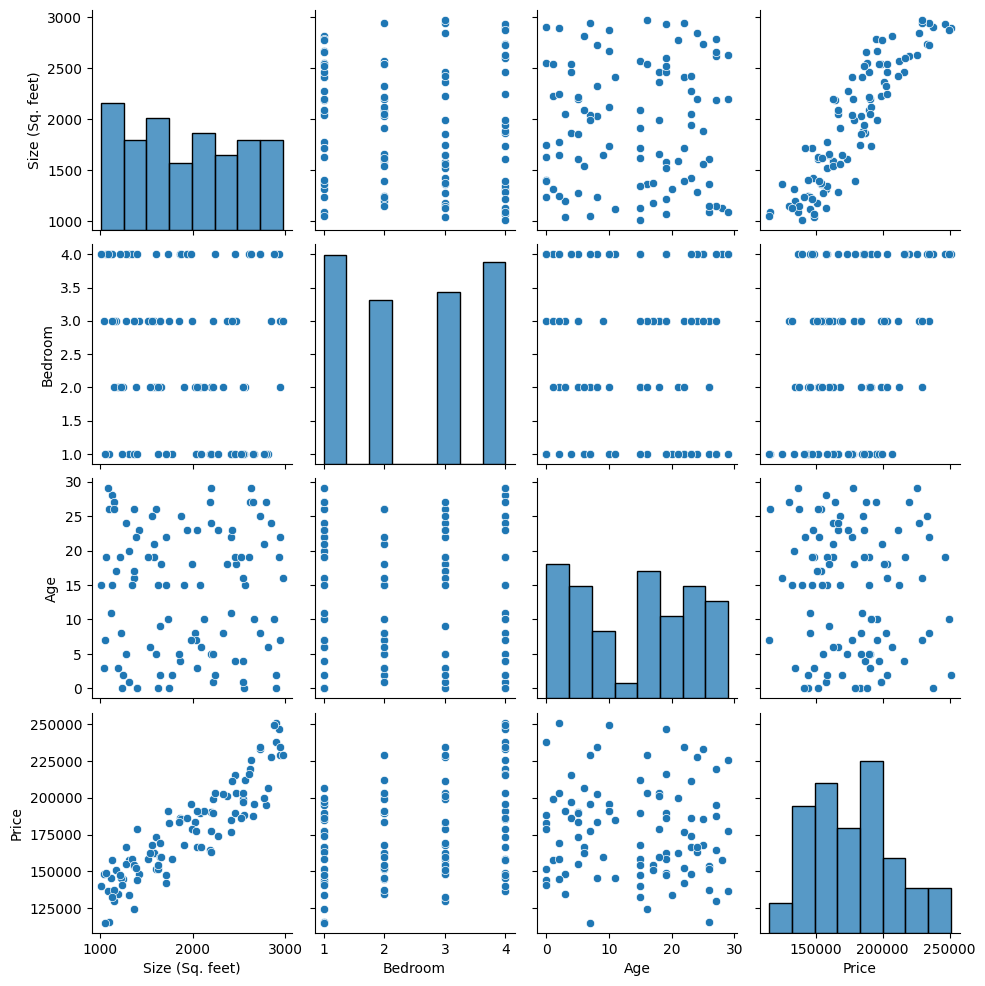

In [32]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [33]:
X=df[['Size (Sq. feet)', 'Bedroom', 'Age']]
y=df['Price']

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)

#Model training
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Model coefficients
print(f"Model Coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficient: [   49.7211189  10201.39373159  -327.39325538]
Model Intercept: 60186.74483874334


In [35]:
#Model Prediction
y_pred=model.predict(X_test)

In [42]:
# Evaluation metrics
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Square: {r2}")

Mean Square Error: 39602641.265887015
Mean Absolute Error: 5464.804535437527
R-Square: 0.9605741581181997


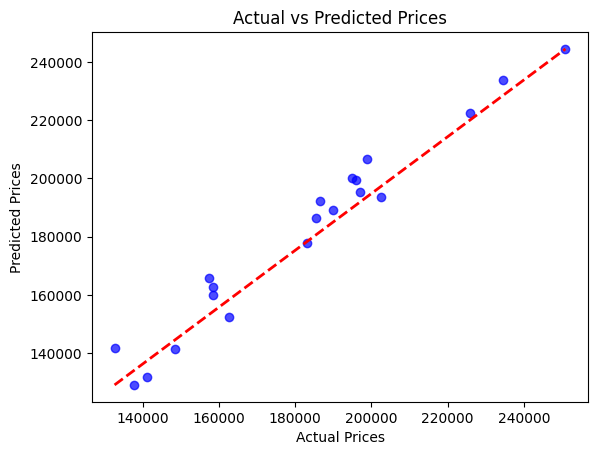

In [53]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()